In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import celluloid

In [3]:
import sys

In [4]:
from matplotlib.animation import FuncAnimation

In [5]:
import cv2
import os

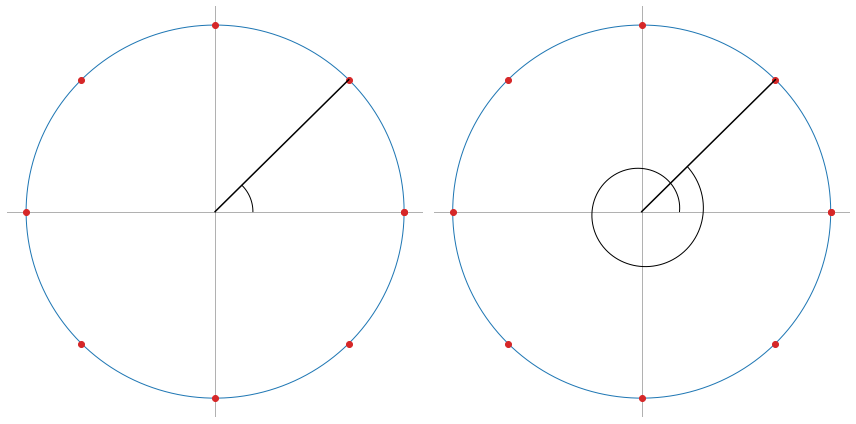

In [16]:
Ts = 0.125
t = np.arange(0, 1 + Ts, Ts)
ang = np.linspace(0, 2 * np.pi, 360)
xcirc, ycirc = np.cos(ang), np.sin(ang)
freq = 5.0
outdir = "_temp"

fig = figure(figsize=(12, 6))
ax = fig.add_subplot(121)
ax.plot(xcirc, ycirc, lw=1, color="tab:blue")
ax.axhline(0, lw=1, color="k", alpha=0.3)
ax.axvline(0, lw=1, color="k", alpha=0.3)
ax.plot(np.cos(2 * np.pi * t), np.sin(2 * np.pi * t), 'o', color="tab:red")
ax.plot([0, np.cos(2 * np.pi * Ts)],
        [0, np.sin(2 * np.pi * Ts)], color="k")

# Movement1
_t = np.arange(0, 0.25 * np.pi, 0.01)
_r = 0.2
_x1, _y1 = _r * np.cos(_t), _r * np.sin(_t)

ax.plot(_x1, _y1, lw=1, color='k')
ax.axis("off")

ax = fig.add_subplot(122)
ax.plot(xcirc, ycirc, lw=1, color="tab:blue")
ax.axhline(0, lw=1, color="k", alpha=0.3)
ax.axvline(0, lw=1, color="k", alpha=0.3)
ax.plot(np.cos(2 * np.pi * t), np.sin(2 * np.pi * t), 'o', color="tab:red")
ax.plot([0, np.cos(2 * np.pi * Ts)],
        [0, np.sin(2 * np.pi * Ts)], color="k")

# Movement 2
_t = np.arange(0, 2.25 * np.pi, 0.01)
_r = (0.2 + 0.02 * _t)
_x2, _y2 = _r * np.cos(_t), _r * np.sin(_t)

ax.plot(_x2, _y2, lw=1, color='k')
ax.axis("off")

plt.tight_layout()

In [26]:
image_folder = '_temp'
video_name = 'video.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 60, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()

MovieWriter Pillow unavailable; using Pillow instead.


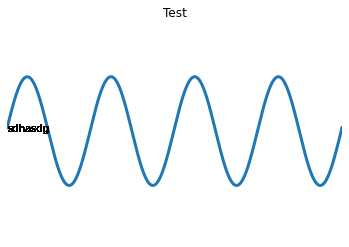

In [13]:
fig = plt.figure(dpi=300)
ax.axis("off")
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
ax.set_title("Test")
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    plt.box(False)
    return line,

def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    ax.axis("off")
    ax.text(0, 0, "sdhasdg")
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                     frames=200, interval=20, blit=True)

anim.save('sine_wave1.gif', writer='Pillow')